Import packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

Data preparation

In [2]:
df = pd.read_csv('../data/energydata_complete_cleaned.csv', parse_dates=['date'], index_col='date')
df.sort_index(inplace=True)
print('Data shape: ', df.shape)

# Define features (Abalation) and target variable
features = ['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 
            'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 
            'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 
            'Visibility', 'Tdewpoint', 'rv1']
            # 'is_weekend', 'hour_sin', 'hour_cos', 'day_of_week_sin', 
            # 'day_of_week_cos', 'Appliances_lag1', 'Appliances_rolling_mean_6']
target = 'Appliances'
print('Feature number: ', len(features))

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
print('Training data shape: ', X_train.shape)
print('Testing data shape: ', X_test.shape)

Data shape:  (19591, 38)
Feature number:  26
Training data shape:  (13713, 26)
Testing data shape:  (5878, 26)


In [3]:
model_results_ablation = {}

Linear Regression

Linear Regression Coefficients:  [  2.0000041   -1.91353419  14.78365531 -16.5025152  -12.77195174
  26.56375939   4.36202958  -2.74859879  -0.1133358    0.86441137
   0.16547277   7.25022625   0.31276972   2.11012179  -1.64471732
   8.17998024  -4.55072081 -17.62578025  -0.88492779 -10.45383382
   0.21125325  -1.03753614   2.04336113   0.1216715    4.71290627
  -0.04080591]
Linear Regreesion Mean Squared Error:  8876.539944541086
Linear Regreesion Root Mean Squared Error:  94.2153912295708
Linear Regreesion Mean Absolute Error:  53.16474027759238
Linear Regreesion R^2 Score:  0.16297974247799218


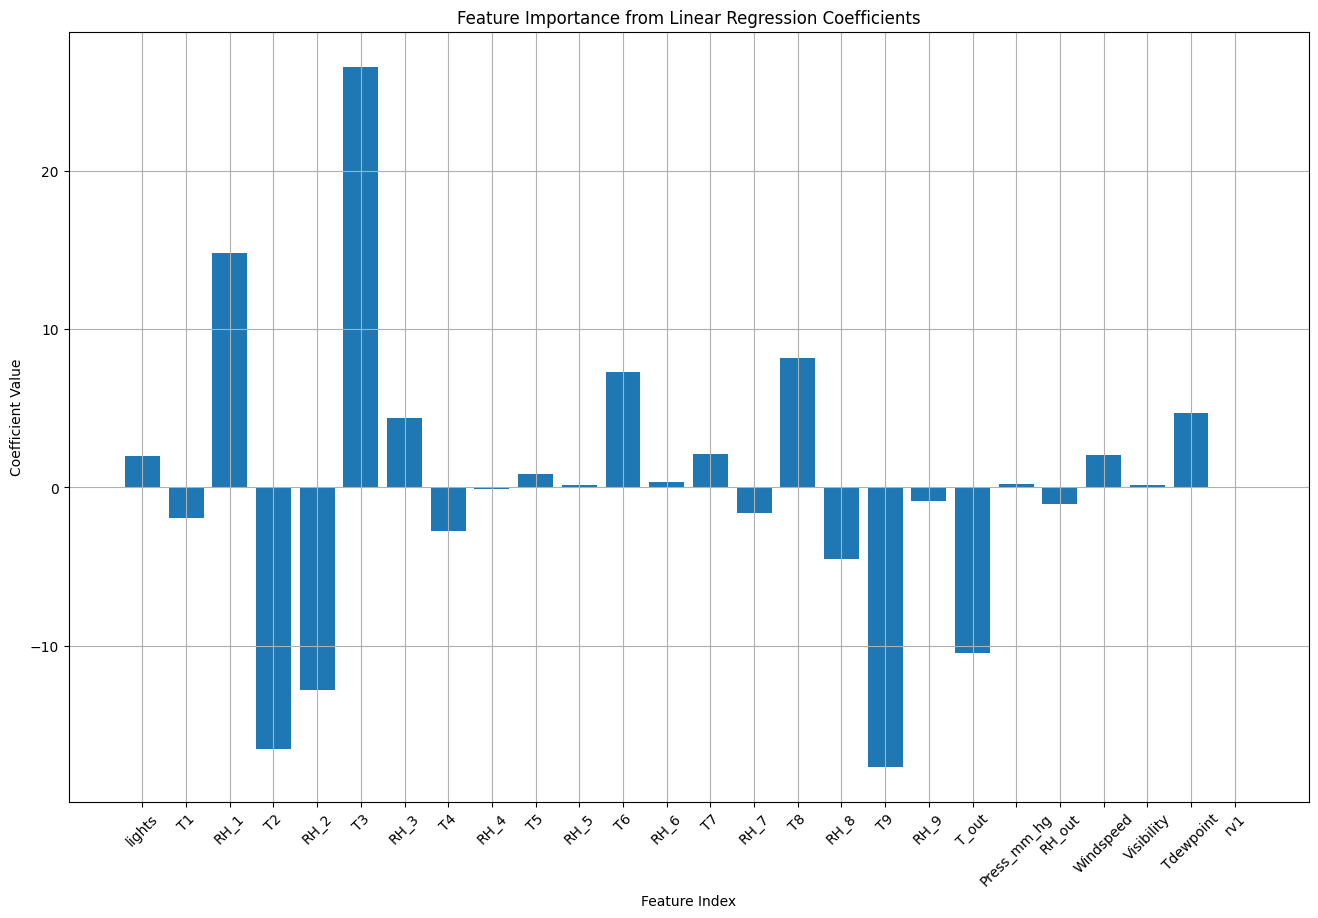

In [4]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)
print("Linear Regression Coefficients: ", lin_reg.coef_)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Linear Regreesion Mean Squared Error: ", mse)
print("Linear Regreesion Root Mean Squared Error: ", rmse)
print("Linear Regreesion Mean Absolute Error: ", mae)
print("Linear Regreesion R^2 Score: ", r2)

# model_results['Linear Regression'] = {
#     'predictions': y_pred,
#     'MSE': mse,
#     'RMSE': rmse,
#     'MAE': mae,
#     'R2': r2
# }

# Feature coefficients analysis
importance = lin_reg.coef_
plt.figure(figsize=(16,10))
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(ticks=range(len(features)), labels=features, rotation=45)
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance from Linear Regression Coefficients')
plt.grid()
plt.show()

Support vector regression

In [ ]:
svr = SVR(kernel='rbf', C=10)
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = root_mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("SVR Mean Squared Error: ", mse_svr)
print("SVR Root Mean Squared Error: ", rmse_svr)
print("SVR Mean Absolute Error: ", mae_svr)
print("SVR R^2 Score: ", r2_svr)

model_results_ablation['Support Vector Regression'] = {
    'predictions': y_pred_svr,
    'MSE': mse_svr,
    'RMSE': rmse_svr,
    'MAE': mae_svr,
    'R2': r2_svr
}

SVR Mean Squared Error:  11354.36550622418
SVR Root Mean Squared Error:  106.55686512948934
SVR Mean Absolute Error:  47.425648273124914
SVR R^2 Score:  -0.07066875149516494


NameError: name 'model_results' is not defined

Decision Tree

In [ ]:
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = root_mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print("Decision Tree Mean Squared Error: ", mse_dt)
print("Decision Tree Root Mean Squared Error: ", rmse_dt)
print("Decision Tree Mean Absolute Error: ", mae_dt)
print("Decision Tree R^2 Score: ", r2_dt)

# model_results['Decision Tree'] = {
#     'predictions': y_pred_dt,
#     'MSE': mse_dt,
#     'MAE': mae_dt,
#     'R2': r2_dt
# }

Random forest regression

In [ ]:
rf_reg = RandomForestRegressor(
    n_estimators = 100, 
    random_state = 42,
    max_depth = 5,
    min_samples_split = 10,
    min_samples_leaf = 5,
    max_features = 0.8,
)

rf_reg.fit(X_train, y_train)

y_pred_rf = rf_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Mean Squared Error: ", mse_rf)
print("Random Forest Root Mean Squared Error: ", rmse_rf)
print("Random Forest Mean Absolute Error: ", mae_rf)
print("Random Forest R^2 Score: ", r2_rf)

model_results_ablation['Random Forest'] = {
    'predictions': y_pred_rf,
    'MSE': mse_rf,
    "RMSE": rmse_rf,
    'MAE': mae_rf,
    'R2': r2_rf
}

# Feature importance from Random Forest
importances = rf_reg.feature_importances_
plt.figure(figsize=(16,10))
plt.bar([x for x in range(len(importances))], importances)
plt.xticks(ticks=range(len(features)), labels=features, rotation=45)
plt.xlabel('Feature Index')
plt.ylabel('Importance Score')
plt.title('Feature Importance from Random Forest')
plt.grid()
plt.show()

XGBoost

In [ ]:
xgb_reg = xgb.XGBRegressor(
    n_estimators = 100,
    learning_rate = 0.03, 
    max_depth = 3, 
    random_state = 42
)

xgb_reg.fit(X_train, y_train)

y_pred_xgb = xgb_reg.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = root_mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("XGBoost Mean Squared Error: ", mse_xgb)
print("XGBoost Root Mean Squared Error: ", rmse_xgb)
print("XGBoost Mean Absolute Error: ", mae_xgb)
print("XGBoost R^2 Score: ", r2_xgb)

model_results_ablation['XGBoost'] = {
    'predictions': y_pred_xgb,
    'MSE': mse_xgb,
    'RMSE': rmse_xgb,
    'MAE': mae_xgb,
    'R2': r2_xgb
}

# Feature importance from XGBoost
xgb_importances = xgb_reg.feature_importances_
plt.figure(figsize=(16,10))
plt.bar([x for x in range(len(xgb_importances))], xgb_importances)
plt.xticks(ticks=range(len(features)), labels=features, rotation=45)
plt.xlabel('Feature Index')
plt.ylabel('Importance Score')
plt.title('Feature Importance from XGBoost')
plt.grid()
plt.show()

Multi-layer Perceptron

In [ ]:
mlp_model = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    random_state=42,
    max_iter=100,
    early_stopping=True,
    learning_rate_init=0.001
)
mlp_model.fit(X_train, y_train)

y_pred_mlp = mlp_model.predict(X_test)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
rmse_mlp = root_mean_squared_error(y_test, y_pred_mlp)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)
print("MLP Mean Squared Error: ", mse_mlp)
print("MLP Root Mean Squared Error: ", rmse_mlp)
print("MLP Mean Absolute Error: ", mae_mlp)
print("MLP R^2 Score: ", r2_mlp)

model_results_ablation['Multi-layer Perceptron'] = {
    'predictions': y_pred_mlp,
    'MSE': mse_mlp,
    'RMSE' : rmse_mlp,
    'MAE': mae_mlp,
    'R2': r2_mlp
}

Results and visualisation

In [ ]:
results_comparison = pd.DataFrame({
    model: {
        'MSE': metrics['MSE'],
        'RMSE': metrics['RMSE'],
        'MAE': metrics['MAE'],
        'R2': metrics['R2']
    }
    for model, metrics in model_results_ablation.items()
}).T.round(4)

print("Model Performance Metrics (Use Original Features for feature ablation test)")
print(results_comparison)